Epoch 1/20
 7/14 [==============>...............] - ETA: 0s - loss: 0.0506

2023-12-02 17:41:08.691217: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


14/14 [==============================] - 0s 11ms/step - loss: 0.0558
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 3/20
14/14 [==============================] - 0s 6ms/step - loss: 0.0603
Epoch 4/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 5/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 6/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 7/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0603
Epoch 8/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 9/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 10/20
14/14 [==============================] - 0s 7ms/step - loss: 0.0603
Epoch 11/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0603
Epoch 12/20
14/14 [==============================] - 0s 8ms/step - loss: 0.0603
Epoch 13/20
14/14 [==============================] - 0s 7ms

2023-12-02 17:41:10.952776: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4/4 [==============================] - 0s 12ms/step
混淆矩阵：
[[5 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 [2 0 0 ... 0 0 0]
 ...
 [2 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]]
分类报告：
              precision    recall  f1-score   support

           0       0.05      1.00      0.09         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         2
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         3
          10       0.00      0.00      0.00         4
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00        11
          13       0.00      0.00      0.00         2
     

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

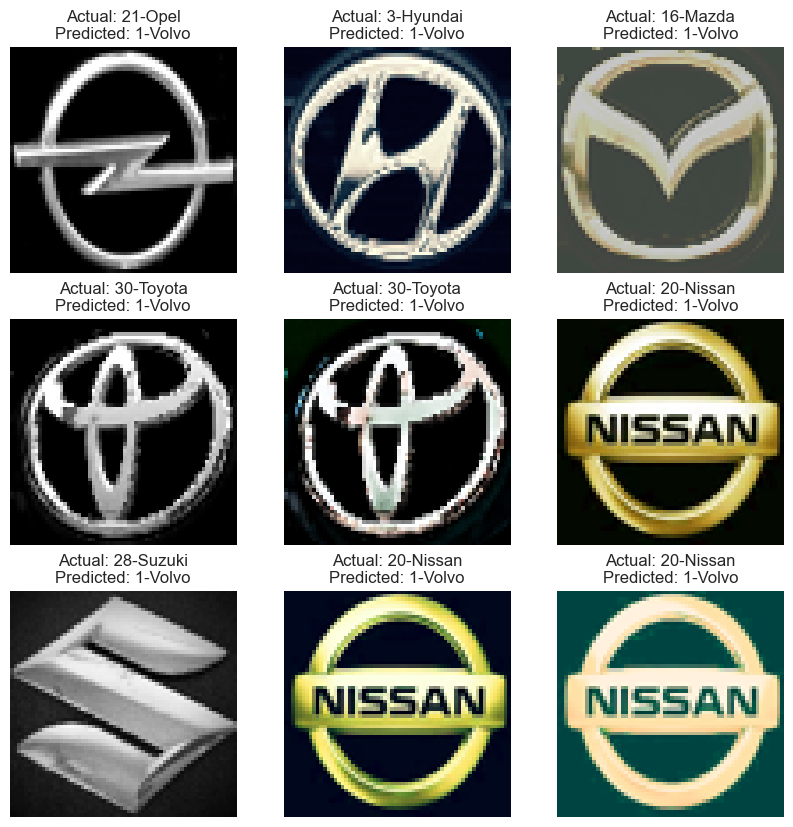

In [27]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten
from sklearn.cluster import KMeans
import numpy as np
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from PIL import Image
import glob


# 自定义损失函数
def custom_loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

# 定义ANN类
class ANN:
    def __init__(self, input_shape, num_classes):
        self.model = Sequential([
            Flatten(input_shape=input_shape),
            Dense(128, activation='relu'),
            Dense(128, activation='relu'),
            Dense(num_classes, activation='softmax')
        ])
        self.model.compile(optimizer='adam', loss=custom_loss_function)

    def fit(self, X_train, y_train, epochs=20, batch_size=32):
        self.model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

    def transform(self, X):
        return self.model.predict(X)

# 定义KMeans分类器类
class KMeansClassifier:
    def __init__(self, n_clusters):
        self.model = KMeans(n_clusters=n_clusters)

    def fit(self, X):
        self.model.fit(X)

    def predict(self, X):
        return self.model.predict(X)

# 定义StackingEnsemble类
class StackingEnsemble:
    def __init__(self, ann_model, kmeans_model):
        self.ann_model = ann_model
        self.kmeans_model = kmeans_model

    def fit(self, X_train, y_train):
        self.ann_model.fit(X_train, y_train)
        features = self.ann_model.transform(X_train)
        self.kmeans_model.fit(features)

    def predict(self, X):
        features = self.ann_model.transform(X)
        return self.kmeans_model.predict(features)

# 数据导入和预处理
def load_images(image_paths, target_size=(64, 64)):
    images = []
    labels = []

    for image_path in image_paths:
        # 打开图像并转换为RGB格式，确保没有透明度通道
        image = Image.open(image_path).convert('RGB').resize(target_size)
        image = np.array(image) / 255.0  # 归一化
        label = image_path.split('/')[-2]  # 假设文件夹名称是类别
        images.append(image)
        labels.append(label)

    return np.array(images), np.array(labels)


# 图像路径
image_paths = glob.glob('Car_Logo_Dataset/**/*.png', recursive=True)
X, y = load_images(image_paths)

# 将标签编码为整数
unique_labels = np.unique(y)
label_to_int = {label: i for i, label in enumerate(unique_labels)}
y = np.array([label_to_int[label] for label in y])

# 分割数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 转换标签为one-hot编码
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

# 初始化模型
ann = ANN(input_shape=X_train.shape[1:], num_classes=len(unique_labels))
kmeans = KMeansClassifier(n_clusters=len(unique_labels))

# 创建集成模型
ensemble = StackingEnsemble(ann, kmeans)

# 训练模型
ensemble.fit(X_train, y_train_one_hot)

# 使用集成模型进行预测
predictions = ensemble.predict(X_test)

# 可视化结果
print("混淆矩阵：")
print(confusion_matrix(y_test, predictions))

print("分类报告：")
print(classification_report(y_test, predictions))

# 显示一些预测结果
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_test[i])
    plt.title(f"Actual: {unique_labels[y_test[i]]}\nPredicted: {unique_labels[predictions[i]]}")
    plt.axis('off')
plt.show()